# Tigress data exclusive processing
This is only necessary for the CMIP data, which resides on the princeton machine

In [1]:
import numpy as np
import xarray as xr
import xesmf as xe
from glob import glob
from xarrayutils import concat_dim_da
%matplotlib inline

In [2]:
def fetch_equator_full(ds, field='o2'):
    ds_target = xr.Dataset({'lat': (['lat'], np.arange(-5, 5, 0.5)),
                     'lon': (['lon'], np.arange(-270, -60, 1)),
                    }
                   )
    ds = ds.copy()
    print(ds.attrs['model_id'])
    if len(ds.lon.shape) == 1:
        lon, lat = np.meshgrid(ds.lon, ds.lat)
        ds = ds.rename({'lon':'rlon', 'lat':'rlat'})
        
        llon = xr.DataArray(lon, dims=['rlat', 'rlon'])
        llat = xr.DataArray(lat, dims=['rlat', 'rlon'])
        ds.coords['lon'] = llon
        ds.coords['lat'] = llat

    regridder = xe.Regridder(ds, ds_target, 'bilinear')
    out = regridder(ds[field])
    regridder.clean_weight_file()
    return out
# So this is not ideal..I need to rename the coords to dimensions and then average over 1S-1N

# Check if all files are there
def filecheck(path):
    li = glob(path)
    if len(li) == 1:
        return li[0]
    elif len(li) == 0:
        raise RuntimeError('No files found for %s' %(path))
    else:
        raise RuntimeError('Multiple files found: %s' %li)
        

def replace_time(ds, reftime):
    ds = ds.copy()

#     if len(ds.time)>=len(reftime):
#         ds['time'].data = reftime[0:len(reftime)]
#     else:
    ds['time'].data = reftime[0:len(ds.time)]
#     print(ds.time[0])
    return ds

SCENARIO:piControl


/tiger/scratch/gpfs/jbusecke/projects/global_oxygen/src/xarray/xarray/coding/times.py:419: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  self.use_cftime)
/tiger/scratch/gpfs/jbusecke/projects/global_oxygen/src/xarray/xarray/coding/times.py:419: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  self.use_cftime)
/home/jbusecke/code/miniconda/envs/global_oxygen/lib/python3.6/site-packages/numpy/core/numeric.py:501: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/tiger/scratch/gpfs/jbusecke/projects/global_oxygen/src/xarray/xarray/coding/times.py:419: SerializationWarning: Unable to decode time axis 

NorESM1-ME
Create weight file: bilinear_384x320_20x210.nc


/home/jbusecke/code/miniconda/envs/global_oxygen/lib/python3.6/site-packages/xesmf/smm.py:73: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not C_CONTIGUOUS. "


Remove file bilinear_384x320_20x210.nc
CESM1-BGC
Create weight file: bilinear_384x320_20x210.nc


/home/jbusecke/code/miniconda/envs/global_oxygen/lib/python3.6/site-packages/xesmf/smm.py:73: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not C_CONTIGUOUS. "


Remove file bilinear_384x320_20x210.nc


/home/jbusecke/code/miniconda/envs/global_oxygen/lib/python3.6/site-packages/numpy/core/numeric.py:501: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


MPI-ESM-LR
Create weight file: bilinear_220x256_20x210.nc


/home/jbusecke/code/miniconda/envs/global_oxygen/lib/python3.6/site-packages/xesmf/smm.py:73: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not C_CONTIGUOUS. "


Remove file bilinear_220x256_20x210.nc
GFDL-ESM2M
Create weight file: bilinear_200x360_20x210.nc


/home/jbusecke/code/miniconda/envs/global_oxygen/lib/python3.6/site-packages/xesmf/smm.py:73: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not C_CONTIGUOUS. "


Remove file bilinear_200x360_20x210.nc
IPSL-CM5A-LR
Create weight file: bilinear_85x182_20x210.nc


/home/jbusecke/code/miniconda/envs/global_oxygen/lib/python3.6/site-packages/xesmf/smm.py:73: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not C_CONTIGUOUS. "


Remove file bilinear_85x182_20x210.nc
GFDL-ESM2G
Create weight file: bilinear_210x360_20x210.nc


/home/jbusecke/code/miniconda/envs/global_oxygen/lib/python3.6/site-packages/xesmf/smm.py:73: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not C_CONTIGUOUS. "


Remove file bilinear_210x360_20x210.nc


/home/jbusecke/code/miniconda/envs/global_oxygen/lib/python3.6/site-packages/numpy/core/numeric.py:501: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


MPI-ESM-MR
Create weight file: bilinear_404x802_20x210.nc


/home/jbusecke/code/miniconda/envs/global_oxygen/lib/python3.6/site-packages/xesmf/smm.py:73: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not C_CONTIGUOUS. "


Remove file bilinear_404x802_20x210.nc
NorESM1-ME
Create weight file: bilinear_384x320_20x210.nc


/home/jbusecke/code/miniconda/envs/global_oxygen/lib/python3.6/site-packages/xesmf/smm.py:73: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not C_CONTIGUOUS. "


Remove file bilinear_384x320_20x210.nc
CESM1-BGC
Create weight file: bilinear_384x320_20x210.nc


/home/jbusecke/code/miniconda/envs/global_oxygen/lib/python3.6/site-packages/xesmf/smm.py:73: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not C_CONTIGUOUS. "


Remove file bilinear_384x320_20x210.nc


/home/jbusecke/code/miniconda/envs/global_oxygen/lib/python3.6/site-packages/numpy/core/numeric.py:501: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


MPI-ESM-LR
Create weight file: bilinear_220x256_20x210.nc


/home/jbusecke/code/miniconda/envs/global_oxygen/lib/python3.6/site-packages/xesmf/smm.py:73: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not C_CONTIGUOUS. "


Remove file bilinear_220x256_20x210.nc
GFDL-ESM2M
Create weight file: bilinear_200x360_20x210.nc


/home/jbusecke/code/miniconda/envs/global_oxygen/lib/python3.6/site-packages/xesmf/smm.py:73: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not C_CONTIGUOUS. "


Remove file bilinear_200x360_20x210.nc
IPSL-CM5A-LR
Create weight file: bilinear_85x182_20x210.nc


/home/jbusecke/code/miniconda/envs/global_oxygen/lib/python3.6/site-packages/xesmf/smm.py:73: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not C_CONTIGUOUS. "


Remove file bilinear_85x182_20x210.nc
GFDL-ESM2G
Create weight file: bilinear_210x360_20x210.nc


/home/jbusecke/code/miniconda/envs/global_oxygen/lib/python3.6/site-packages/xesmf/smm.py:73: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not C_CONTIGUOUS. "


Remove file bilinear_210x360_20x210.nc


/home/jbusecke/code/miniconda/envs/global_oxygen/lib/python3.6/site-packages/numpy/core/numeric.py:501: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


MPI-ESM-MR
Create weight file: bilinear_404x802_20x210.nc


/home/jbusecke/code/miniconda/envs/global_oxygen/lib/python3.6/site-packages/xesmf/smm.py:73: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not C_CONTIGUOUS. "


Remove file bilinear_404x802_20x210.nc
<xarray.Dataset>
Dimensions:  (lat: 20, lev: 70, lon: 210, model: 7, time: 100)
Coordinates:
  * model    (model) <U12 'NorESM1-ME' 'CESM1-BGC' ... 'GFDL-ESM2G' 'MPI-ESM-MR'
  * lon      (lon) int64 -270 -269 -268 -267 -266 -265 ... -65 -64 -63 -62 -61
  * lat      (lat) float64 -5.0 -4.5 -4.0 -3.5 -3.0 -2.5 ... 2.5 3.0 3.5 4.0 4.5
  * time     (time) object 2006-07-01 00:00:00 ... 2105-07-01 00:00:00
  * lev      (lev) float64 0.0 5.0 10.0 15.0 ... 6e+03 6.25e+03 6.5e+03 6.75e+03
Data variables:
    o2       (model, time, lev, lat, lon) float64 0.2031 0.203 ... nan nan
    uo       (model, time, lev, lat, lon) float64 0.1483 0.1436 ... nan nan
SCENARIO:rcp85


/tiger/scratch/gpfs/jbusecke/projects/global_oxygen/src/xarray/xarray/coding/times.py:419: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  self.use_cftime)
/tiger/scratch/gpfs/jbusecke/projects/global_oxygen/src/xarray/xarray/coding/times.py:419: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  self.use_cftime)
/home/jbusecke/code/miniconda/envs/global_oxygen/lib/python3.6/site-packages/numpy/core/numeric.py:501: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/tiger/scratch/gpfs/jbusecke/projects/global_oxygen/src/xarray/xarray/coding/times.py:419: SerializationWarning: Unable to decode time axis 

NorESM1-ME
Create weight file: bilinear_384x320_20x210.nc


/home/jbusecke/code/miniconda/envs/global_oxygen/lib/python3.6/site-packages/xesmf/smm.py:73: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not C_CONTIGUOUS. "


Remove file bilinear_384x320_20x210.nc
CESM1-BGC
Create weight file: bilinear_384x320_20x210.nc


/home/jbusecke/code/miniconda/envs/global_oxygen/lib/python3.6/site-packages/xesmf/smm.py:73: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not C_CONTIGUOUS. "


Remove file bilinear_384x320_20x210.nc


/home/jbusecke/code/miniconda/envs/global_oxygen/lib/python3.6/site-packages/numpy/core/numeric.py:501: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


MPI-ESM-LR
Create weight file: bilinear_220x256_20x210.nc


/home/jbusecke/code/miniconda/envs/global_oxygen/lib/python3.6/site-packages/xesmf/smm.py:73: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not C_CONTIGUOUS. "


Remove file bilinear_220x256_20x210.nc
GFDL-ESM2M
Create weight file: bilinear_200x360_20x210.nc


/home/jbusecke/code/miniconda/envs/global_oxygen/lib/python3.6/site-packages/xesmf/smm.py:73: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not C_CONTIGUOUS. "


Remove file bilinear_200x360_20x210.nc
MRI-ESM1
Create weight file: bilinear_250x360_20x210.nc


/home/jbusecke/code/miniconda/envs/global_oxygen/lib/python3.6/site-packages/xesmf/smm.py:73: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not C_CONTIGUOUS. "


Remove file bilinear_250x360_20x210.nc
IPSL-CM5A-LR
Create weight file: bilinear_85x182_20x210.nc


/home/jbusecke/code/miniconda/envs/global_oxygen/lib/python3.6/site-packages/xesmf/smm.py:73: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not C_CONTIGUOUS. "


Remove file bilinear_85x182_20x210.nc
GFDL-ESM2G
Create weight file: bilinear_210x360_20x210.nc


/home/jbusecke/code/miniconda/envs/global_oxygen/lib/python3.6/site-packages/xesmf/smm.py:73: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not C_CONTIGUOUS. "


Remove file bilinear_210x360_20x210.nc
MPI-ESM-MR
Create weight file: bilinear_404x802_20x210.nc


/home/jbusecke/code/miniconda/envs/global_oxygen/lib/python3.6/site-packages/xesmf/smm.py:73: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not C_CONTIGUOUS. "


Remove file bilinear_404x802_20x210.nc
NorESM1-ME
Create weight file: bilinear_384x320_20x210.nc


/home/jbusecke/code/miniconda/envs/global_oxygen/lib/python3.6/site-packages/xesmf/smm.py:73: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not C_CONTIGUOUS. "


Remove file bilinear_384x320_20x210.nc
CESM1-BGC
Create weight file: bilinear_384x320_20x210.nc


/home/jbusecke/code/miniconda/envs/global_oxygen/lib/python3.6/site-packages/xesmf/smm.py:73: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not C_CONTIGUOUS. "


Remove file bilinear_384x320_20x210.nc


/home/jbusecke/code/miniconda/envs/global_oxygen/lib/python3.6/site-packages/numpy/core/numeric.py:501: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


MPI-ESM-LR
Create weight file: bilinear_220x256_20x210.nc


/home/jbusecke/code/miniconda/envs/global_oxygen/lib/python3.6/site-packages/xesmf/smm.py:73: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not C_CONTIGUOUS. "


Remove file bilinear_220x256_20x210.nc
GFDL-ESM2M
Create weight file: bilinear_200x360_20x210.nc


/home/jbusecke/code/miniconda/envs/global_oxygen/lib/python3.6/site-packages/xesmf/smm.py:73: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not C_CONTIGUOUS. "


Remove file bilinear_200x360_20x210.nc
MRI-ESM1
Create weight file: bilinear_250x360_20x210.nc


/home/jbusecke/code/miniconda/envs/global_oxygen/lib/python3.6/site-packages/xesmf/smm.py:73: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not C_CONTIGUOUS. "


Remove file bilinear_250x360_20x210.nc
IPSL-CM5A-LR
Create weight file: bilinear_85x182_20x210.nc


/home/jbusecke/code/miniconda/envs/global_oxygen/lib/python3.6/site-packages/xesmf/smm.py:73: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not C_CONTIGUOUS. "


Remove file bilinear_85x182_20x210.nc
GFDL-ESM2G
Create weight file: bilinear_210x360_20x210.nc


/home/jbusecke/code/miniconda/envs/global_oxygen/lib/python3.6/site-packages/xesmf/smm.py:73: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not C_CONTIGUOUS. "


Remove file bilinear_210x360_20x210.nc
MPI-ESM-MR
Create weight file: bilinear_404x802_20x210.nc


/home/jbusecke/code/miniconda/envs/global_oxygen/lib/python3.6/site-packages/xesmf/smm.py:73: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not C_CONTIGUOUS. "


Remove file bilinear_404x802_20x210.nc
<xarray.Dataset>
Dimensions:  (lat: 20, lev: 70, lon: 210, model: 8, time: 295)
Coordinates:
  * model    (model) <U12 'NorESM1-ME' 'CESM1-BGC' ... 'GFDL-ESM2G' 'MPI-ESM-MR'
  * time     (time) object 2006-07-01 00:00:00 ... 2300-07-01 00:00:00
  * lon      (lon) int64 -270 -269 -268 -267 -266 -265 ... -65 -64 -63 -62 -61
  * lat      (lat) float64 -5.0 -4.5 -4.0 -3.5 -3.0 -2.5 ... 2.5 3.0 3.5 4.0 4.5
  * lev      (lev) float64 0.0 5.0 10.0 15.0 ... 6e+03 6.25e+03 6.5e+03 6.75e+03
Data variables:
    o2       (model, time, lev, lat, lon) float64 0.1995 0.1998 ... nan nan
    uo       (model, time, lev, lat, lon) float64 0.2497 0.2446 ... nan nan


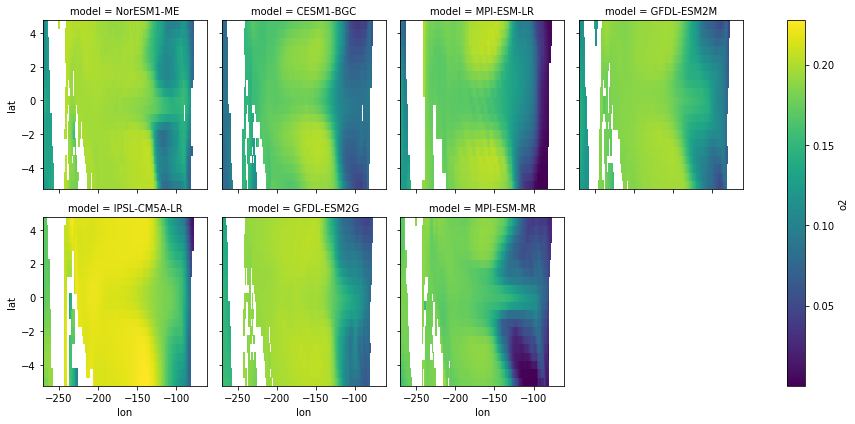

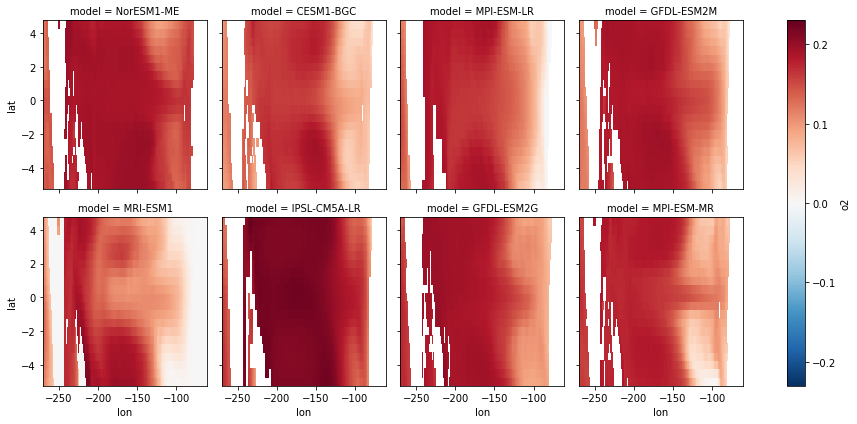

In [33]:
path = '/tigress/laurer/CMIP5'

for scenario in ['piControl', 'rcp85', ]:
    print('SCENARIO:%s' %scenario)
    opath = '../data/processed/CMIP5_tropical_combined_%s.nc' %scenario
    filelist = glob(path+'/cmip*')
    models = list(set([a.replace(path,'').split('.')[3] for a in filelist]))
    
    # there is no piControl fir MRI
    if scenario == 'piControl':
        models = [m for m in models if not 'MRI' in m]

    # for now I am missing the HadGEM and Miroc
    models = [m for m in models if ('HadGEM' not in m) and ('MIROC' not in m)]

    uo_files = [filecheck('%s/cmip5.merge.*.%s.%s.yr.*uo*nc' %(path, m, scenario)) for m in models]
    o2_files = [filecheck('%s/cmip5.merge.*.%s.%s.yr.*o2*nc' %(path, m, scenario)) for m in models]

    raw_uo_datasets = [xr.open_mfdataset(path) for path in uo_files]
    raw_o2_datasets = [xr.open_mfdataset(path) for path in o2_files]

    ############ interpolate all datasets onto reference model (take one 300 yr one)
    # time_ref = uo_datasets['IPSL-CM5A-LR'].time
    # Ok this is HELL! I will replace all calendars assuming they start in 2006 and represent yearly averages
    # I CANNOT SAVE THIS AAAEEERRRHGGGHFGHGHGHFGHGHGHGHG so i will restrict it to a valid 
    time_ref = xr.cftime_range(start='2006', end='2301', freq='AS-JUL', calendar='standard')#.to_datetimeindex()

    # parse to dict
    uo_datasets = {k:v for k,v in zip(models, raw_uo_datasets)}
    o2_datasets = {k:v for k,v in zip(models, raw_o2_datasets)}

    # precut the weird french model grid
    if 'IPSL-CM5A-LR' in o2_datasets.keys():
        o2_datasets['IPSL-CM5A-LR'] = o2_datasets['IPSL-CM5A-LR'].sel(y=slice(0,85))
        uo_datasets['IPSL-CM5A-LR'] = uo_datasets['IPSL-CM5A-LR'].sel(y=slice(0,85))

    if 'MRI-ESM1' in o2_datasets.keys():
        o2_datasets['MRI-ESM1'] = o2_datasets['MRI-ESM1'].sel(y=slice(0,250))
        uo_datasets['MRI-ESM1'] = uo_datasets['MRI-ESM1'].sel(y=slice(0,250))

    ############# interpolate everything on a common vertical grid
    ref_lev = o2_datasets['NorESM1-ME'].lev

    o2_datasets = {k:replace_time(v.interp(lev=ref_lev),
                                           time_ref) for k,v in o2_datasets.items()}
    uo_datasets = {k:replace_time(v.interp(lev=ref_lev),
                                           time_ref) for k,v in uo_datasets.items()}

    # Process the datasets:
    uo_datasets_processed = {kk:fetch_equator_full(dd.load(), field='uo') for kk, dd in uo_datasets.items()}
    o2_datasets_processed = {kk:fetch_equator_full(dd.load(), field='o2') for kk, dd in o2_datasets.items()}


    datasets_combined = {k:xr.Dataset({'o2':o2_datasets_processed[k].copy().interp(lev=ref_lev),
                                       'uo':uo_datasets_processed[k].copy().interp(lev=ref_lev)}) for k in o2_datasets_processed.keys()}

    mod_names = list(datasets_combined.keys())
    mod_ds = [datasets_combined[k] for k in mod_names]
    ds = xr.concat(mod_ds, concat_dim_da(mod_names, 'model'))
    print(ds)
    ds.attrs['scenario'] = scenario

    ds.o2.isel(time=10, lev=12).plot(col='model', col_wrap=4)
    ds.to_netcdf(opath)